In [55]:
import pickle
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt 


In [56]:
with open(r"..\pipeline.pkl", 'rb') as f:
    pipeline = pickle.load(f)

https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

In [57]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_features='log2',
                                        min_samples_split=5, n_estimators=50,
                                        random_state=42))])

In [58]:
model = pipeline["model"]
scaler = pipeline["scaler"]

In [59]:
import pandas as pd

In [60]:
X_train = pd.read_csv("X_train")
X_test = pd.read_csv("X_test")
y_train = pd.read_csv("y_train")
y_test = pd.read_csv("y_test")

In [62]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_test = X_test.drop('Unnamed: 0', axis=1)
y_train = y_train.drop('Unnamed: 0', axis=1)
y_test = y_test.drop('Unnamed: 0', axis=1)

In [79]:
y_test.value_counts()

Polarity
1           492
0           459
Name: count, dtype: int64

In [81]:
X_test.columns

Index(['t_syll3', 'root_propn_var', 'root_space_var', 'corr_punct_var',
       'uber_ttr_no_lem', 'a_propn_ps', 'smog'],
      dtype='object')

In [80]:
X_test

,t_syll3,root_propn_var,root_space_var,corr_punct_var,uber_ttr_no_lem,a_propn_ps,smog
0,94,6.92,0.37,0.45,47.64,1.60,7.68
1,19,5.98,0.76,0.69,43.60,6.50,6.23
2,211,6.48,0.00,0.46,35.91,1.87,7.28
3,11,3.23,0.50,1.11,62.67,2.82,5.71
4,14,4.73,0.32,0.53,47.06,3.07,5.71
...,...,...,...,...,...,...,...
946,12,4.02,0.30,0.71,42.83,0.69,3.67
947,6,3.32,1.00,0.50,140.35,5.50,9.89
948,85,9.77,0.49,0.53,49.35,3.16,5.14
949,148,9.84,0.20,0.50,46.50,2.72,6.75


In [63]:
import shap

In [64]:
shap.initjs()

In [88]:
model_prob = model.predict_proba(X_test)[0]
model_prob

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0.61435065, 0.38564935])

In [89]:
rf_explainer = shap.TreeExplainer(model, model_output="raw")
shap_values = rf_explainer(X_test)

In [74]:
import numpy as np

In [90]:
np.shape(shap_values.values)

(951, 7, 2)

In [66]:
X_test.shape

(951, 7)

In [67]:
X_test.shape[1:]

(7,)

Dimension of the shap values array is samples X number of features X number of possible outcomes (True/False)

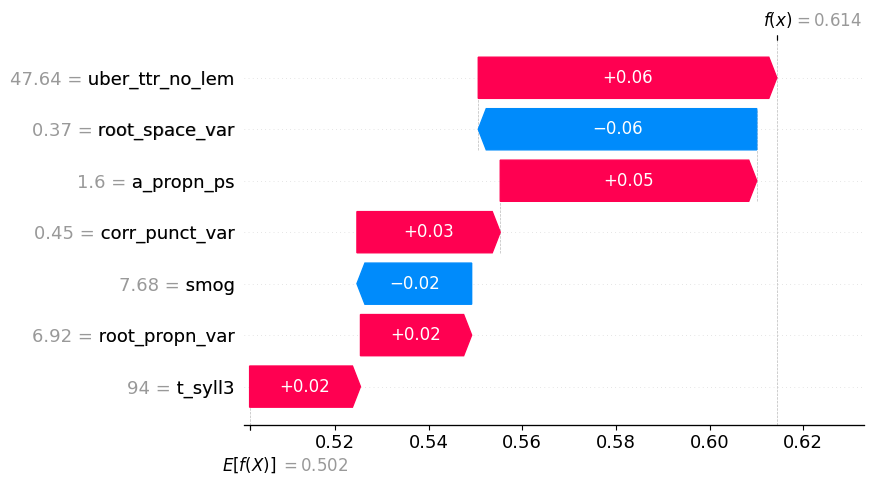

In [92]:
shap.plots.waterfall(shap_values[0,:, 0]) # first example in the test set, all the features for the first possible outcome(fake)

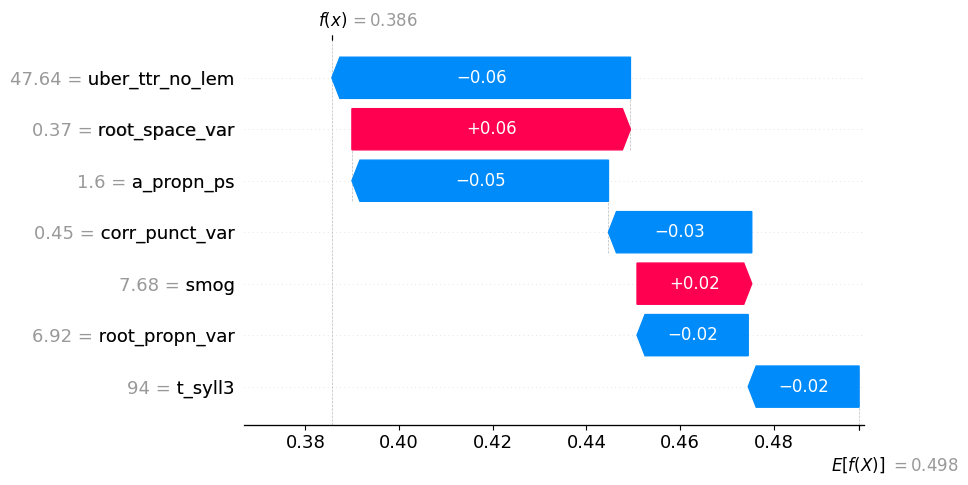

In [93]:
shap.plots.waterfall(shap_values[0,:, 1]) # first example in the test set, all the features for the first possible outcome(fake)

https://www.youtube.com/watch?v=2xlgOu22YgE

https://www.youtube.com/watch?v=L8_sVRhBDLU